# Tarea 3, parte 2
---

## Problema 1

De la base de datos preseleccionada, de la base de datos **I/337/tgas** bajo el alias **gaia**, la consulta selecciona las columnas:

* gaia.source_id,
* gaia.hip,
* el resultado de: gaia.phot_g_mean_mag+5\*log10(gaia.parallax)-10 bajo el alias *g_mag_abs_gaia*,
* el resultado de: gaia.phot_g_mean_mag+5\*log10(hip.plx)-10 bajo el alias *g_mag_abs_hip*,
* hip."B-V"

*gaia* y *hip* son tablas dentro de la base de datos.

Con INNER JOIN se seleccionan también (en el mismo set de resultados) las columnas de la base **I/311/hip2** bajo el alias **hip**, para cada objeto seleccionado en la consulta anterior, es decir, donde gaia.hip coincida con hip.HIP.

HIP es la id del objeto en el catálogo.

Todo lo anterior se realiza solo para los objetos que cumplan a la vez las condiciones:

* gaia.parallax/gaia.parallax_error >= 5 (_SNR del paralaje de gaia $\geq$5_)
* hip.Plx/hip.e_Plx >= 5 (_SNR del paralaje de hip $\geq$5_)
* hip."e_B-V" > 0.0
* hip."e_B-V" <= 5
* (2.5/log(10))\*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05 (Error del flujo $\leq$ ~5%)

Se procede a ejecutar la consulta mediante el código entregado para obtener un CMD

In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from act4 import *

tap = "http://tapvizier.u-strasbg.fr/TAPVizieR/tap"
adql = """SELECT 
gaia.source_id, gaia.hip, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 as g_mag_abs_gaia,
gaia.phot_g_mean_mag+5*log10(hip.plx)-10 as g_mag_abs_hip,
hip."B-V"
FROM "I/337/tgas" AS gaia
INNER JOIN "I/311/hip2" as hip
ON gaia.hip = hip.HIP
WHERE gaia.parallax/gaia.parallax_error >= 5 AND
hip.Plx/hip.e_Plx >= 5 AND
hip."e_B-V" > 0.0 and hip."e_B-V" <= 0.05 AND
(2.5/log(10))*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05
"""

table = query_TAP(tap,adql)
print len(table)

43564


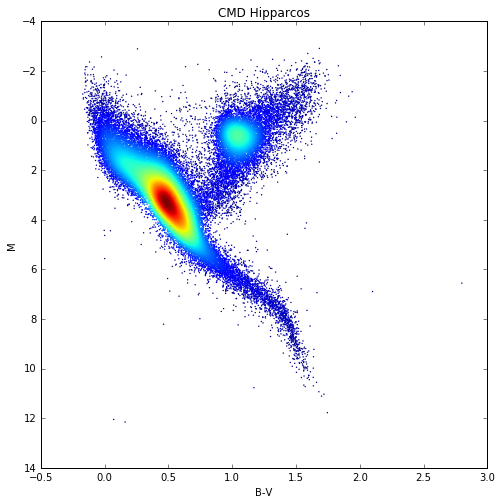

In [2]:
plot_scatter_density(table,'B-V','g_mag_abs_hip','B-V','M','CMD Hipparcos')

---
## Problema 2

